In [5]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

import cv2
import numpy as np
from tensorflow.keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
# Analyzing the shape of the datasets
print("Training data shape:", x_train.shape)  # Shape of training data
print("Training labels shape:", y_train.shape)  # Shape of training labels
print("Testing data shape:", x_test.shape)  # Shape of testing data
print("Testing labels shape:", y_test.shape)  # Shape of testing labels

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


In [8]:
# Concatenating labels from both training and testing sets
all_labels = np.concatenate((y_train, y_test), axis=0)

# Counting unique labels
unique_labels, counts = np.unique(all_labels, return_counts=True)

# Printing the count of each label
for label, count in zip(unique_labels, counts):
    print(f"Nhãn {label}: {count} mẫu")

Nhãn 0: 6903 mẫu
Nhãn 1: 7877 mẫu
Nhãn 2: 6990 mẫu
Nhãn 3: 7141 mẫu
Nhãn 4: 6824 mẫu
Nhãn 5: 6313 mẫu
Nhãn 6: 6876 mẫu
Nhãn 7: 7293 mẫu
Nhãn 8: 6825 mẫu
Nhãn 9: 6958 mẫu


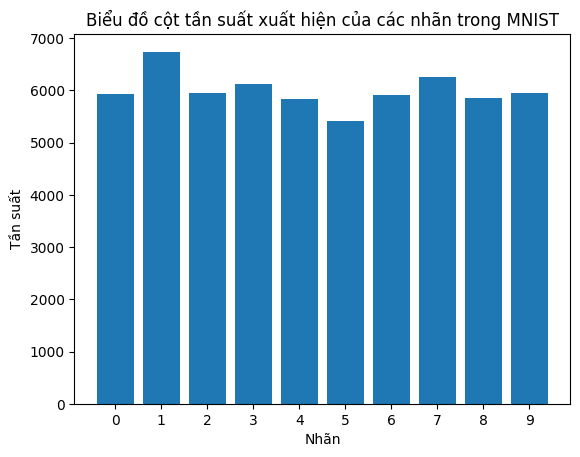

In [9]:
# Tính toán tần suất xuất hiện của các nhãn trong tập huấn luyện
label_counts = [0] * 10
for label in y_train:
    label_counts[label] += 1
# Biểu đồ cột trực quan hóa tần suất của các nhãn
labels = [str(i) for i in range(10)]
plt.bar(labels, label_counts)
plt.xlabel('Nhãn')
plt.ylabel('Tần suất')
plt.title('Biểu đồ cột tần suất xuất hiện của các nhãn trong MNIST')
plt.show()

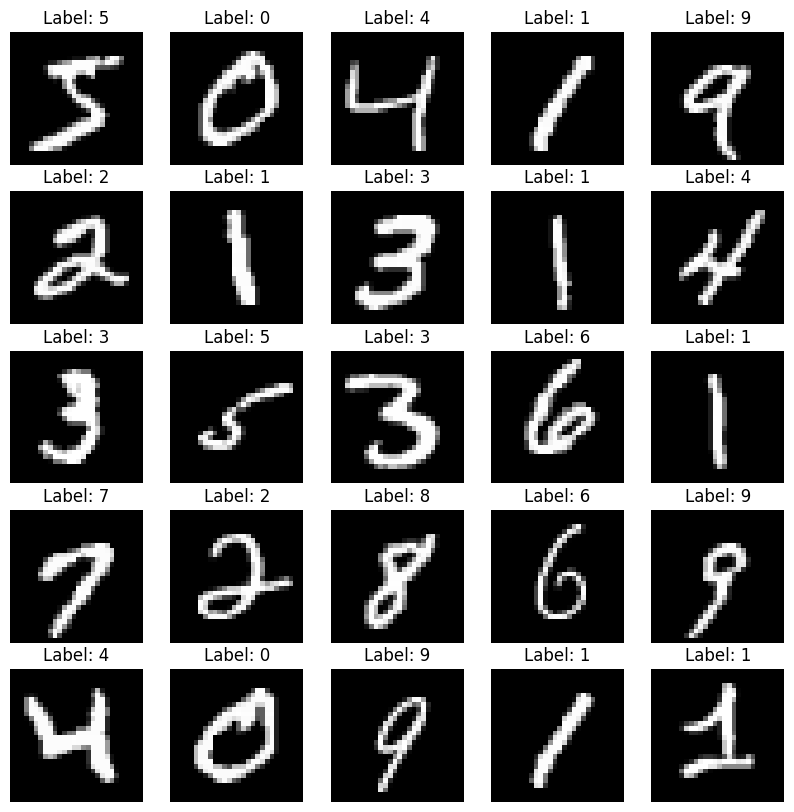

In [10]:
# Displaying some sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [11]:
# Peforming reshaping operation
x_train = x_train.reshape((60000, 28, 28, 1)) / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [12]:
# Xây dựng kiến trúc của mô hình
model = Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [15]:
# Train the model
model_NDA_SVT = model.fit(x_train, y_train, epochs=80, batch_size=64
                    , validation_data=(x_test, y_test))

Epoch 1/80
938/938 [==============================] - 60s 62ms/step - loss: 0.1748 - accuracy: 0.9461 - val_loss: 0.0603 - val_accuracy: 0.9801
Epoch 2/80
938/938 [==============================] - 51s 55ms/step - loss: 0.0480 - accuracy: 0.9852 - val_loss: 0.0440 - val_accuracy: 0.9868
Epoch 3/80
938/938 [==============================] - 50s 54ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0288 - val_accuracy: 0.9914
Epoch 4/80
938/938 [==============================] - 54s 58ms/step - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.0284 - val_accuracy: 0.9914
Epoch 5/80
938/938 [==============================] - 52s 56ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.0376 - val_accuracy: 0.9887
Epoch 6/80
938/938 [==============================] - 50s 54ms/step - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0.0311 - val_accuracy: 0.9908
Epoch 7/80
938/938 [==============================] - 50s 53ms/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0420 - val_accuracy:

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0949 - accuracy: 0.9915
Test Loss: 0.09490550309419632
Test accuracy: 0.9915000200271606


In [17]:
model.save('mnist_model_004.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
